# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3$
 
which has three real roots at $x=-2.5,0.5,1.5$.

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should fill an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.

d)	Modify the code created in part a) to allow for the possibility to find the roots of other polynomials or functions.

**Part A**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [ ]:
# define a generator function for the polynomial
def generator_function(x,*par):
      return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []


par = np.array([1.80,-4.05,0.4,1.0])
nroots_expected = 3

In [ ]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [ ]:
start = time.time()

# Define the size of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = npoints/nsearch

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
nroots_found = 0

# loop over the slices
for i in range(0,int(niter)):
    # Begin at the right most data point in the slice
    y = yval[nsearch*i]
    
    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply Newton's algorithm / bisection method
        #
        # First, get the x-values of the left and right ends of the slice
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.48E-8
        
        diff = 1.0E12
        while (diff>epsilon):
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            
            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        
        # move to the next slice
        ycomp = y
    else:
        # move to the next slice
        ycomp = y
    


print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print(end - start)
time_ejb = (end-start)



Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

0.0010640621185302734


**Part B**

In [ ]:
xstep = []
ystep = []
nsearch = 1

In [ ]:
#varibale nserach starts at 0 and cycles to npoints (10,000)
for nsearch in range(1,int(npoints)):
    
    start = time.time()
    #iteration is 10,000 / 1->10000
    #when neseach nears value of 9999 the below for loop only executes once and 
    #cannot find all roots
    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0
    #first i = 0 --> 10,000,5,000,3,333,2500, etc
    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    #make sense to change
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    #as number of searches (niter) gets smaller, all three roots are likely not found
    else:
        ystep.append(30)
print(xstep)
print(ystep) 

Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

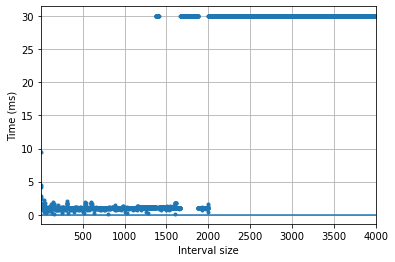

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
#plt.yscale('log')
#plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
#trend at 960
axs.set_xlim(1,4000)
plt.show()

**Part C**

The data here gets very interesting around 1360-1410 and 1675-1875. This is because the plot is revelaing all "30"'s, whihc means that the three roots havw not been found. This can be epected as the nserach value hits 2500 and on because at that point the data is only split into 4 sections. It is possible two roots land in the same section, thus leading to the inability to find all three roots. 

The graphs below zoom in on the two points of interest. 

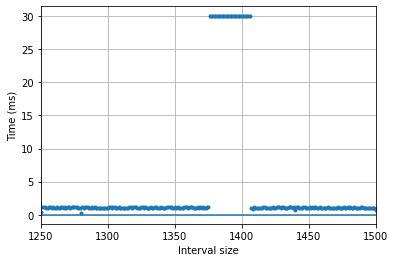

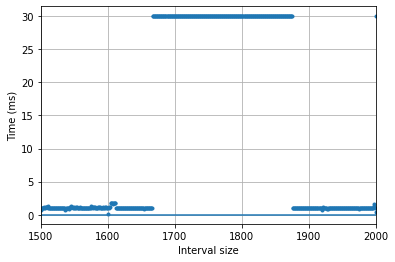

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1250,1500)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1) 
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1500,2000)
plt.show()


In the code below we are going to manipulate some values to determine why this is happening

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [ ]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

# Set the x limits, and the number of points, and calculate the interval
xl = -10
xh = 10
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []


par = np.array([1.8,-4.05,0.4,1.0])
nroots_expected = 3

In [ ]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [ ]:
#varibale nserach starts at 0 and cycles to npoints (10,000)
for nsearch in range(1,int(npoints)):
    
    start = time.time()
    #iteration is 10,000 / 1->10000
    #when neseach nears value of 9999 the below for loop only executes once and 
    #cannot find all roots
    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0
    #first i = 0 --> 10,000,5,000,3,333,2500, etc
    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    #make sense to change to niter??
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    #as number of searches (niter) gets smaller, all three roots are likely not found
    else:
        ystep.append(30)


Found root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3



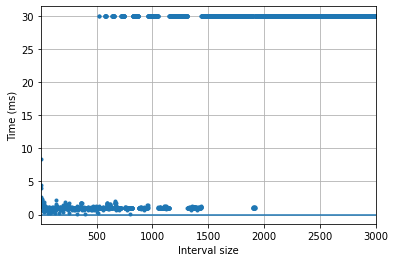

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=1) 
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
axs.set_xlim(1,3000)
plt.show()

When we change the x-limits to -10 and 10 this trend actually become far more apparent. However, when we make the window smaller, perhaps from -2.5 to 2.5 it has the reverse effect. Having a range closer to your roots will produce a better graph.

We know that all roots will not be found until at least 3 bi-sections occurs, because there are three roots. However, sometimes issues arrise if a bisection falls on the foot itself. This could be another explanation for this behavior.

**Part D**

To allow the possibility of finding other various roots I would need to remove the following line of code which sets a fixed value for the funtion

In [ ]:
par = np.array([1.80,-4.05,0.4,1.0])

Instead we always want to call this function


In [ ]:
def generator_function(x,*par):
      return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Linear Regression to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

**Part A**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


In [ ]:
# Read in the data
url = 'https://raw.githubusercontent.com/nsuscello/phys421/master/test.txt'
df = pd.read_csv(url)
df.head(100)

,AltitudeAbSeaLevel,Temperature,AccelerationofGravity,AbsolutePressure,Density,DynamicViscosity
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


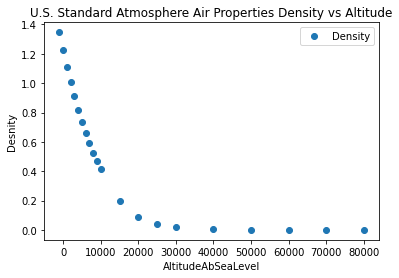

In [ ]:
# plot the data

df.plot('AltitudeAbSeaLevel','Density',style='o')
plt.ylabel('Desnity')
plt.title('U.S. Standard Atmosphere Air Properties Density vs Altitude')
plt.show()

In [ ]:
result = sm.ols('AltitudeAbSeaLevel ~ Density',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:     AltitudeAbSeaLevel   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     29.77
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.90e-05
Time:                        19:43:34   Log-Likelihood:                -231.75
No. Observations:                  21   AIC:                             467.5
Df Residuals:                      19   BIC:                             469.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.15e+04   5078.026      8.173      0.0

In [ ]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

41502.49230590564 -42080.95392732374 0.6104098703803785


**Part C**

In [ ]:
print ("Error in A paramater: +/-" + format(np.sqrt(pcov[0][0]), "e"))
print ("Error in B paramater: +/-" + format(np.sqrt(pcov[1][1]), "e"))
print ("Error in c paramater: +/-" + format(np.sqrt(pcov[2][2]), "e"))

Error in A paramater: +/-2.204336e-02
Error in B paramater: +/-5.099227e-06
Error in c paramater: +/-5.912265e-04


**Part D**

Coefficients (from curve_fit)
[ 1.21748509e+00 -1.14109586e-04  6.35491790e-04]
Covariance Matrix (from curve_fit)
[[ 4.85909931e-04  7.01087767e-08 -1.11432706e-05]
 [ 7.01087767e-08  2.60021118e-11 -2.67919169e-09]
 [-1.11432706e-05 -2.67919169e-09  3.49548764e-07]]


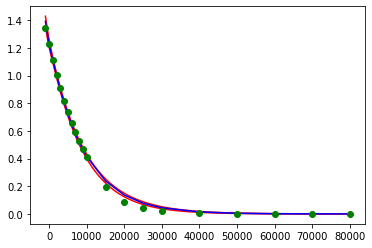

In [ ]:
import seaborn as sns
from math import e


# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

#implement funcion given to us
def fitfunction(x,*paramlist):
    ret = (paramlist[0])*pow(e,paramlist[1]*x+paramlist[2]*np.sqrt(abs(x)))
    return ret

init_vals = [0.0 for x in range(3)]
x = np.array(df['AltitudeAbSeaLevel'])
#remove negative vlaue

y = np.array(df['Density'])

popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)
density_fit = fitfunction(x, *popt)

#A = sqrt of 0 = sqrt 4.85909931e-04
#b = srt 1,1 = sqrt 2.60021118e-11
#c = srt  = sqrt 3.49548764e-07]

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.plot(xi, lower, color ='red', label='xi lower')
plt.plot(xi, upper, color='red', label='xi upper')

plt.plot(x, density_fit, color ='blue', label='bestfit')
plt.plot(x, y, 'o', color='green', label='true values')

#conf interval error bands

plt.show()

At first glance this fit looks pretty good. However, fit functions priozritize higher data values. Below we graphed this function on a log scale and see the fit function is not as accurate as we thought


Coefficients (from curve_fit)
[ 1.21748509e+00 -1.14109586e-04  6.35491790e-04]
Covariance Matrix (from curve_fit)
[[ 4.85909931e-04  7.01087767e-08 -1.11432706e-05]
 [ 7.01087767e-08  2.60021118e-11 -2.67919169e-09]
 [-1.11432706e-05 -2.67919169e-09  3.49548764e-07]]


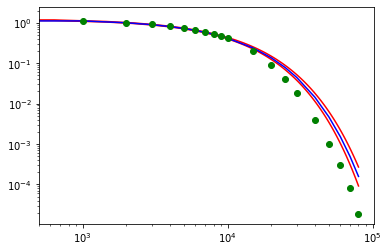

In [ ]:
# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

#implement funcion given to us
def fitfunction(x,*paramlist):
    ret = (paramlist[0])*pow(e,paramlist[1]*x+paramlist[2]*np.sqrt(abs(x)))
    return ret

init_vals = [0.0 for x in range(3)]
x = np.array(df['AltitudeAbSeaLevel'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)
density_fit = fitfunction(x, *popt)

#A = sqrt of 0 = sqrt 4.85909931e-04
#b = srt 1,1 = sqrt 2.60021118e-11
#c = srt  = sqrt 3.49548764e-07]

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.plot(xi, lower, color ='red', label='xi lower')
plt.plot(xi, upper, color='red', label='xi upper')

plt.plot(x, density_fit, color ='blue', label='bestfit')
plt.plot(x, y, 'o', color='green', label='true values')

#conf interval error bands
plt.yscale('log')
plt.xscale('log')
plt.show()

In this above graph, we see the data points do not align as well. Perhaps before graphing and fitting the points we can take the natural log of the y values so that our fit function does not priorizie the high values and gives us better results. 